In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                1190 non-null   int64  
 1   sex                                1190 non-null   int64  
 2   chest pain type                    1190 non-null   int64  
 3   resting blood pressure             1190 non-null   int64  
 4   cholesterol                        1190 non-null   int64  
 5   fasting blood sugar                1190 non-null   int64  
 6   resting electrocardiogram results  1190 non-null   int64  
 7   max heart rate                     1190 non-null   int64  
 8   exercise angina                    1190 non-null   int64  
 9   oldpeak                            1190 non-null   float64
 10  ST slope                           1190 non-null   int64  
 11  target                             1190 non-null   int64

In [4]:
data.head()

,age,sex,chest pain type,resting blood pressure,cholesterol,fasting blood sugar,resting electrocardiogram results,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'cholesterol', 'fasting blood sugar',
       'resting electrocardiogram results', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [6]:
data.mean()

age                                   53.720168
sex                                    0.763866
chest pain type                        3.232773
resting blood pressure               132.153782
cholesterol                          210.363866
fasting blood sugar                    0.213445
resting electrocardiogram results      0.698319
max heart rate                       139.732773
exercise angina                        0.387395
oldpeak                                0.922773
ST slope                               1.624370
target                                 0.528571
dtype: float64

In [7]:
data.median()

age                                   54.0
sex                                    1.0
chest pain type                        4.0
resting blood pressure               130.0
cholesterol                          229.0
fasting blood sugar                    0.0
resting electrocardiogram results      0.0
max heart rate                       140.5
exercise angina                        0.0
oldpeak                                0.6
ST slope                               2.0
target                                 1.0
dtype: float64

In [8]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())



Missing values in the dataset:
age                                  0
sex                                  0
chest pain type                      0
resting blood pressure               0
cholesterol                          0
fasting blood sugar                  0
resting electrocardiogram results    0
max heart rate                       0
exercise angina                      0
oldpeak                              0
ST slope                             0
target                               0
dtype: int64


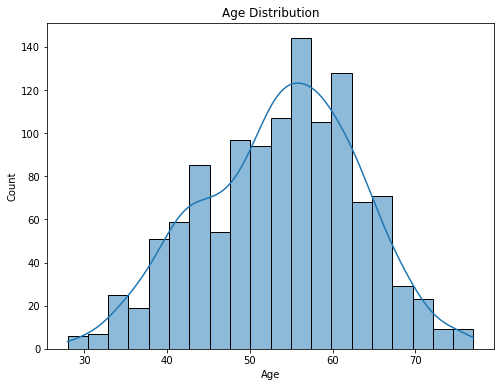

In [9]:
# Visualizations
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

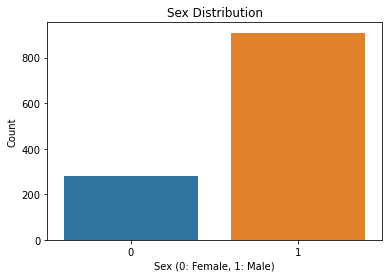

In [10]:
# Visualize sex distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='sex')
plt.title('Sex Distribution')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()


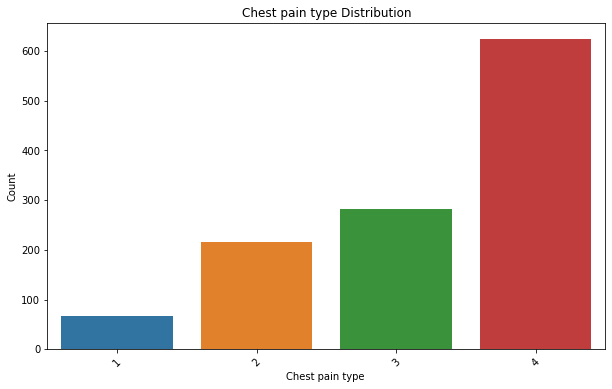

In [11]:
# chest pain type distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='chest pain type', data=data)
plt.title('Chest pain type Distribution')
plt.xlabel('Chest pain type ')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

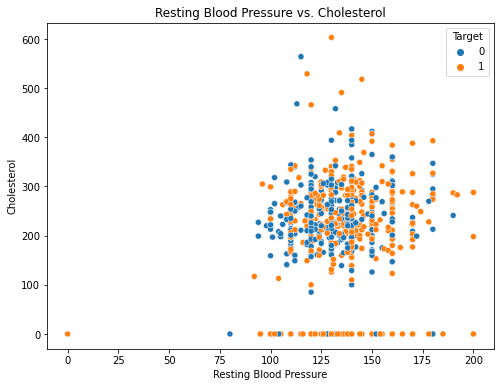

In [12]:
#Resting Blood Pressure vs. Cholesterol Distribution
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='resting blood pressure', y='cholesterol', hue='target')
plt.title('Resting Blood Pressure vs. Cholesterol')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol')
plt.legend(title='Target')
plt.show()

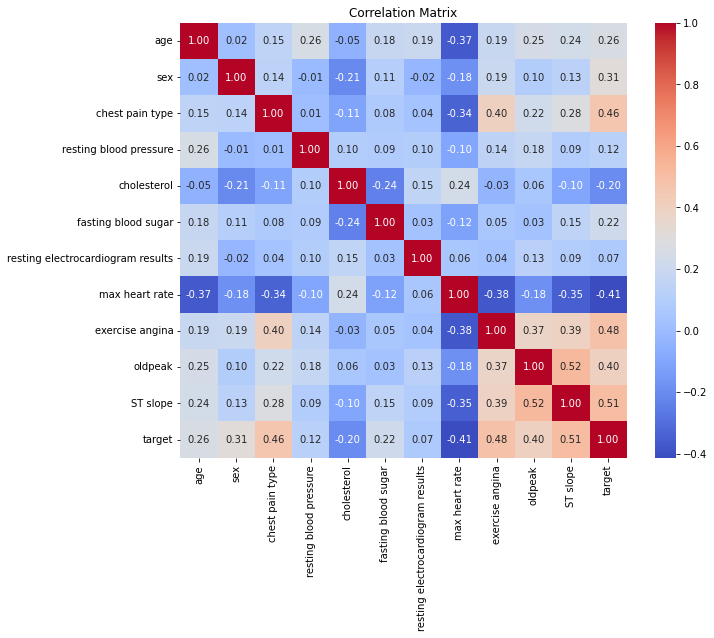

In [13]:
# Visualize correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [14]:
data.isnull().sum()

age                                  0
sex                                  0
chest pain type                      0
resting blood pressure               0
cholesterol                          0
fasting blood sugar                  0
resting electrocardiogram results    0
max heart rate                       0
exercise angina                      0
oldpeak                              0
ST slope                             0
target                               0
dtype: int64

In [15]:

summary_stats=data.describe()
print(summary_stats)

               age          sex  chest pain type  resting blood pressure  \
count  1190.000000  1190.000000      1190.000000             1190.000000   
mean     53.720168     0.763866         3.232773              132.153782   
std       9.358203     0.424884         0.935480               18.368823   
min      28.000000     0.000000         1.000000                0.000000   
25%      47.000000     1.000000         3.000000              120.000000   
50%      54.000000     1.000000         4.000000              130.000000   
75%      60.000000     1.000000         4.000000              140.000000   
max      77.000000     1.000000         4.000000              200.000000   

       cholesterol  fasting blood sugar  resting electrocardiogram results  \
count  1190.000000          1190.000000                        1190.000000   
mean    210.363866             0.213445                           0.698319   
std     101.420489             0.409912                           0.870359   
min

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix, classification_report

In [17]:
y=data['target']
x=data.drop(columns=['target'])

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
#Create a logistic  regression model
model = LogisticRegression()

In [20]:
# Train the model
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [22]:
#Calculate Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [23]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.16806722689075632
R-squared: 0.32082471284868364


In [24]:
# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")


print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8319327731092437
Confusion Matrix:
[[ 86  21]
 [ 19 112]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       107
           1       0.84      0.85      0.85       131

    accuracy                           0.83       238
   macro avg       0.83      0.83      0.83       238
weighted avg       0.83      0.83      0.83       238



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
ynew=data['target']
xnew=data.drop(columns=['target'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(xnew, ynew, test_size=0.2, random_state=42)

In [28]:
# Create a Random Forest Classifier model
model2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model2.predict(X_test)

In [29]:
# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")


print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9453781512605042
Confusion Matrix:
[[ 98   9]
 [  4 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       107
           1       0.93      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238



In [30]:
from sklearn.svm import SVC

In [31]:
y1=data['target']
x1=data.drop(columns=['target'])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [33]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [34]:
# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")


print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.726890756302521
Confusion Matrix:
[[81 26]
 [39 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.71       107
           1       0.78      0.70      0.74       131

    accuracy                           0.73       238
   macro avg       0.73      0.73      0.73       238
weighted avg       0.73      0.73      0.73       238

